In [1]:
library(igraph)
library(ggplot2)


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




# Basic

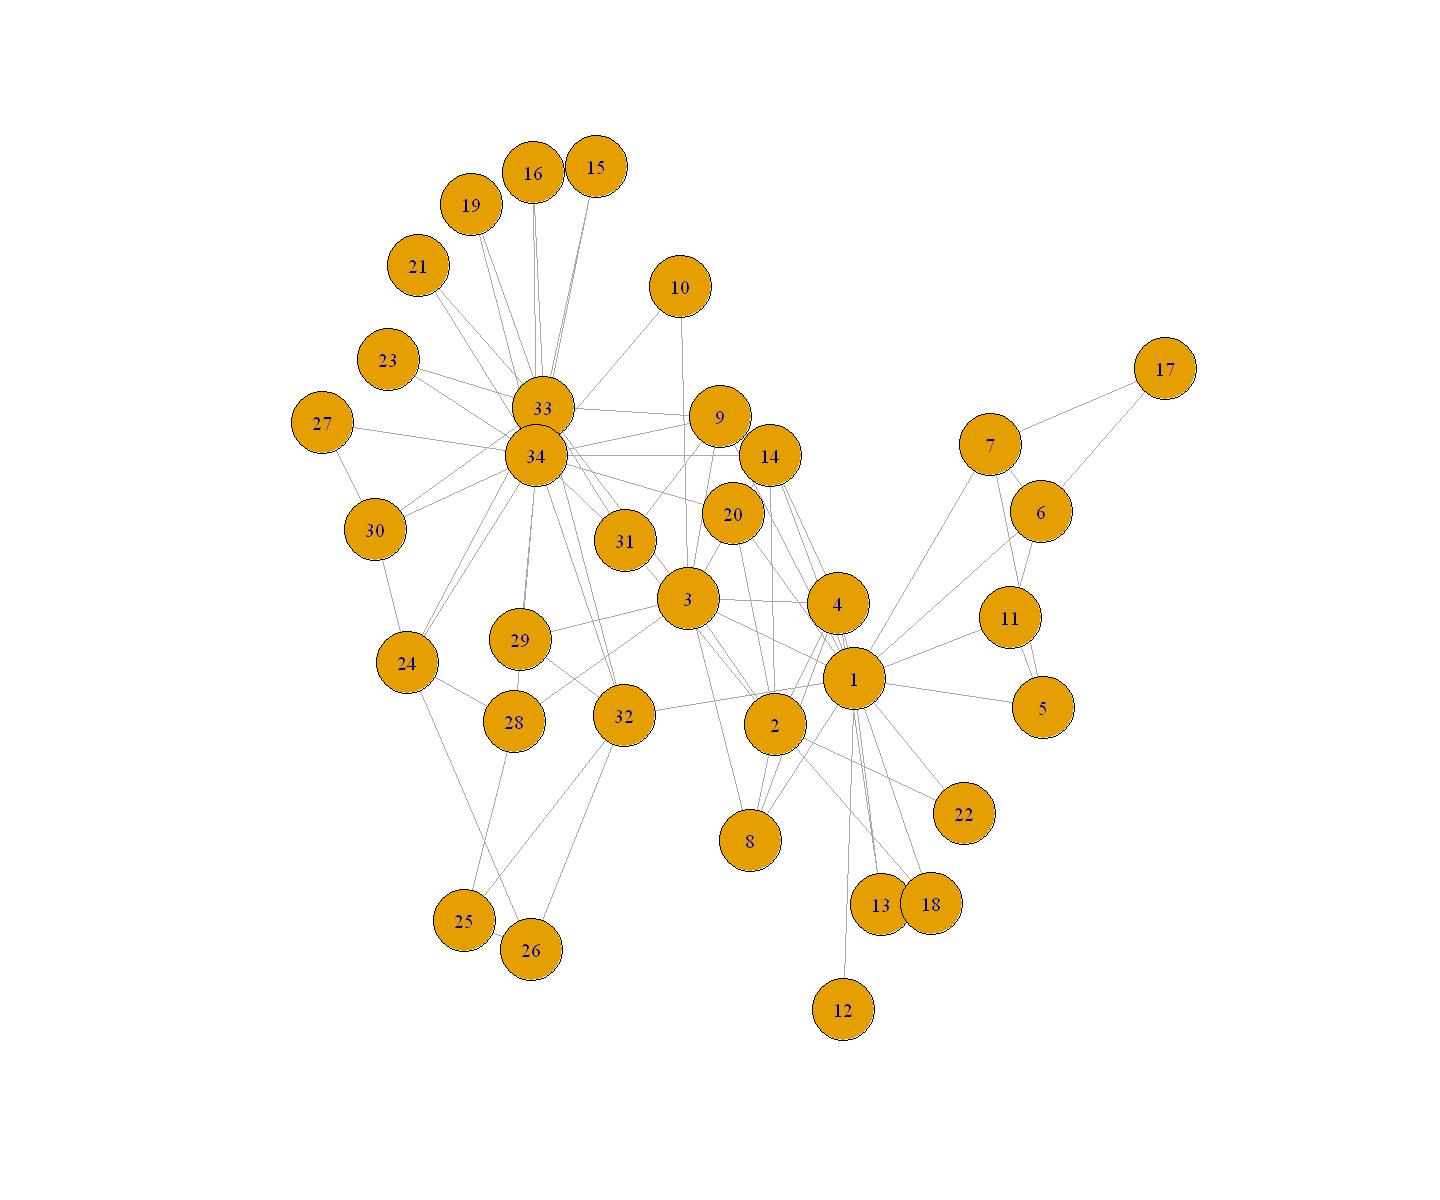

In [2]:
edges = read.csv('data/karata.csv') # 数据集为karata俱乐部成员之间的关系
nodes = unique(c(edges[,1], edges[,2]))

options(repr.plot.width=12, repr.plot.height=10)
g = graph_from_data_frame(d = edges, vertices = nodes, directed = FALSE)
layout = layout_with_kk(g)

plot(g, layout = layout)

# Centrality

## degree: 每个node有多少的edge

In [3]:
degree_data = degree(g)
degree_data

1  2  3  4  5  6  7  9 10 14 15 16 19 20 21 23 24 25 26 27 28 29 30 31 32 33 
15  8 10  6  3  4  4  5  2  5  2  2  2  3  2  2  5  3  3  2  4  3  4  4  6 12 
 8 11 12 13 18 22 17 34 
 4  3  1  2  2  2  2 17

In [4]:
degree_df = data.frame(node = names(degree_data), degree = as.numeric(degree_data))
degree_df = degree_df[order(-degree_df$degree),]
head(degree_df,10)

,node,degree
,<chr>,<dbl>
34,34,17
1,1,15
26,33,12
3,3,10
2,2,8
4,4,6
25,32,6
8,9,5
10,14,5


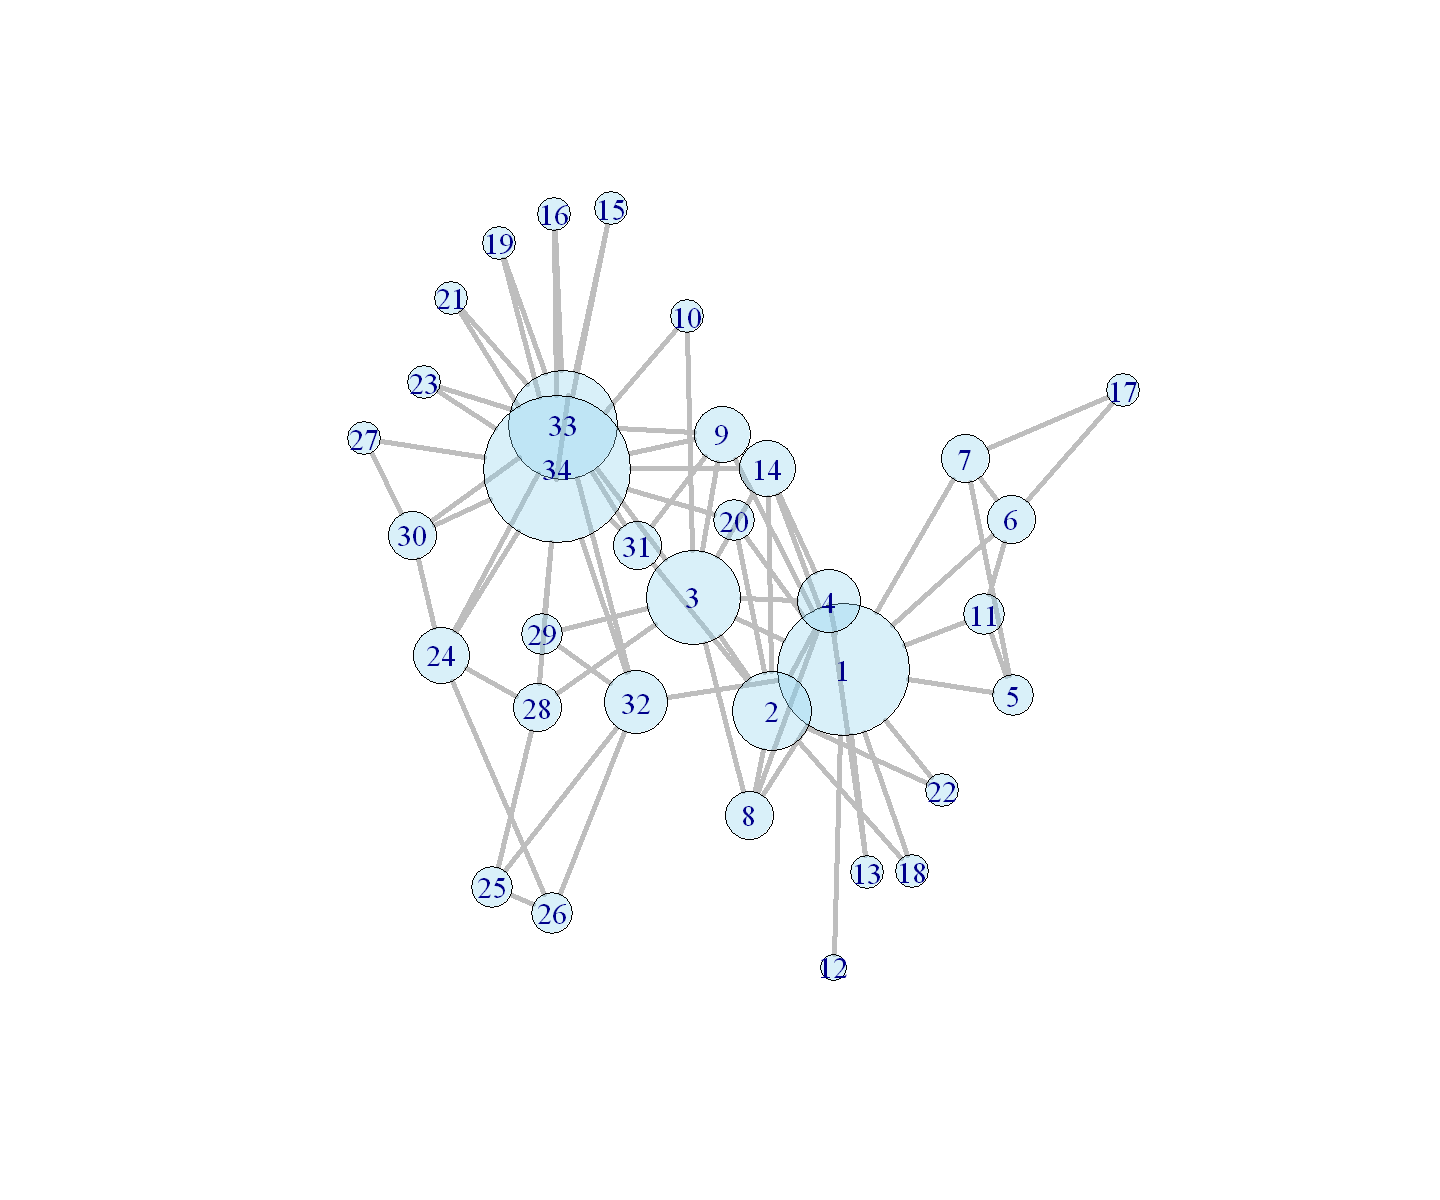

In [5]:
node_size = degree_data * 2 + 5
node_color = rgb(135, 206, 235, alpha = 80, maxColorValue = 255) # 设置透明度
plot(g, layout = layout, vertex.size = node_size, 
     #vertex.label = V(g)$name,
     vertex.label.cex = 1.5, vertex.color = node_color,
     
     edge.width = 4, 
     edge.color = "gray", 
     edge.lty = "solid")

从图中可以看出，34 33 1 3 这4个成员的朋友最多。

## betweenness: 桥梁作用
nodeA和nodeB中必然存在一个最短路径，如果nodeC在AB之间的最短路径上，说明C在AB之间的交流中起到重要的作用。

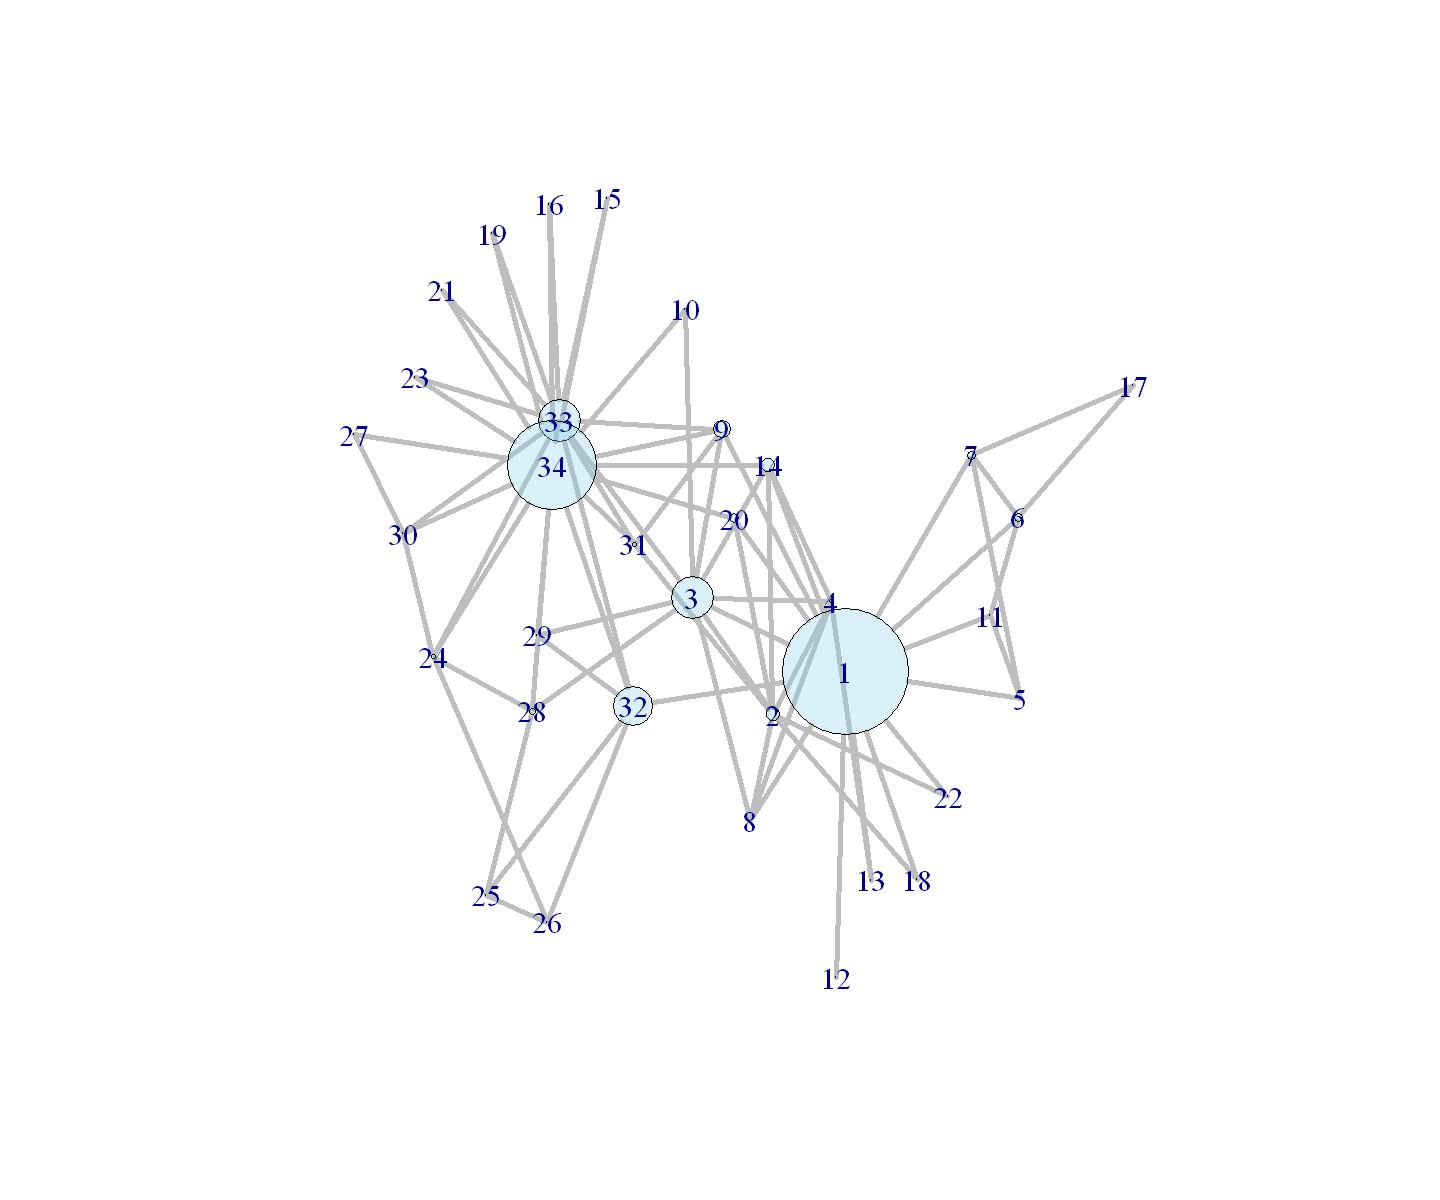

In [6]:
betweenness_data = betweenness(g, directed = FALSE)
node_size = betweenness_data / 7
node_color = rgb(135, 206, 235, alpha = 80, maxColorValue = 255) # 设置透明度
plot(g, layout = layout, vertex.size = node_size, 
     vertex.label.cex = 1.5, vertex.color = node_color,
     
     edge.width = 4, 
     edge.color = "gray", 
     edge.lty = "solid")

成员34 1 既朋友最多，也起到了关键的桥梁作用。成员32的朋友虽然比33和3少，但是能起到类似重要的桥梁作用。

## closeness: 和其余成员的距离均值
两个node之间最短路径之间的距离，对于一个node而言计算它和其他node之间的最短路径的均值，这样得到farness值，1/farness可获得closeness。

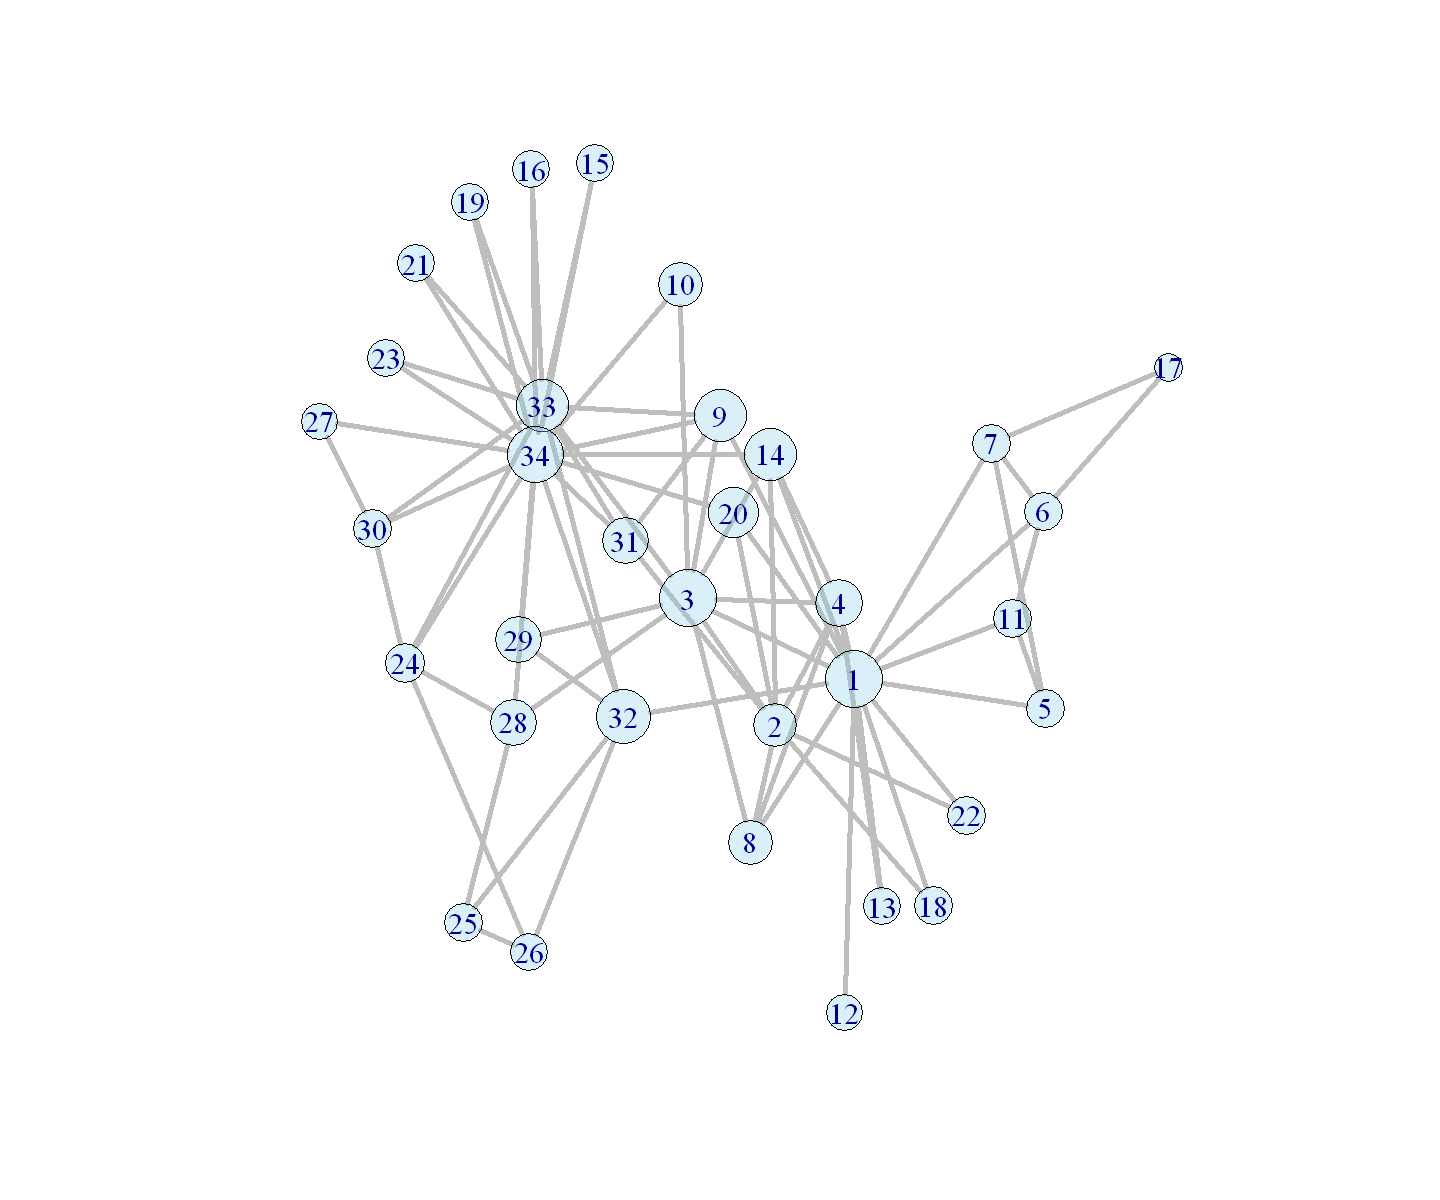

In [7]:
closeness_data = closeness(g)
node_size = closeness_data*800
node_color = rgb(135, 206, 235, alpha = 80, maxColorValue = 255) # 设置透明度
plot(g, layout = layout, vertex.size = node_size, 
     vertex.label.cex = 1.5, vertex.color = node_color,
     
     edge.width = 4, 
     edge.color = "gray", 
     edge.lty = "solid")

整体来看，没有某个成员和大家的亲密程度是特别高的。

# Communities

## Louvain算法

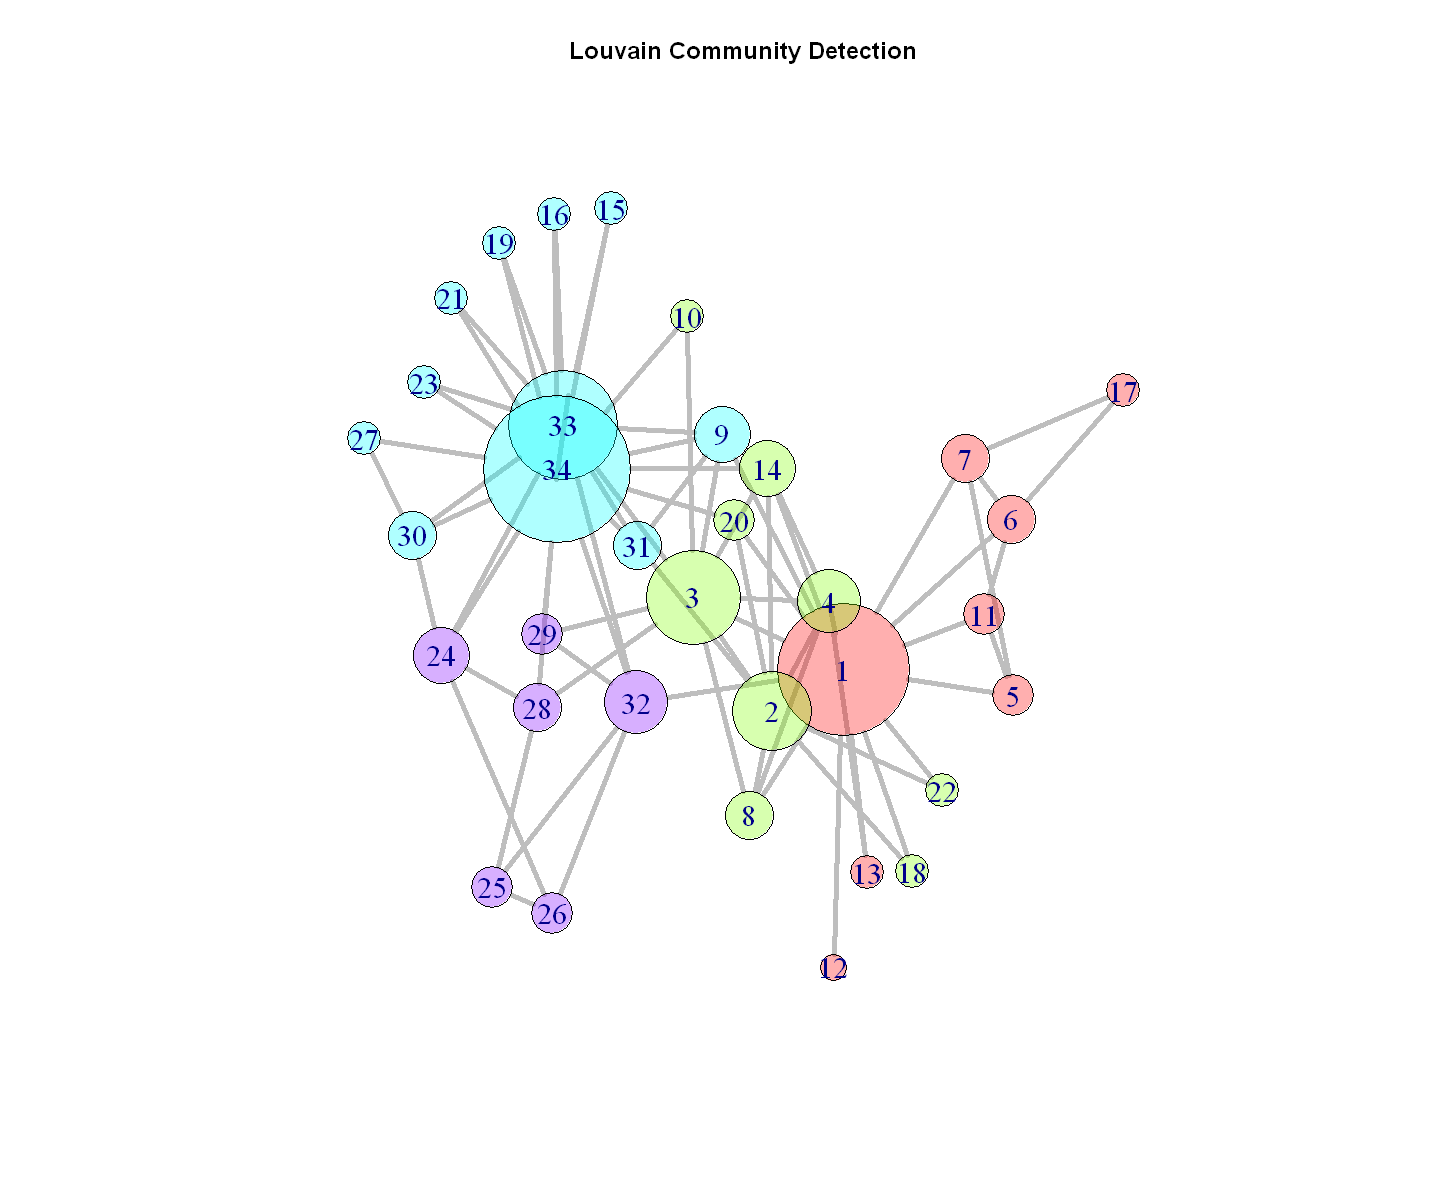

In [8]:
# 使用Louvain算法进行社区检测
louvain_community <- cluster_louvain(g)

communities <- membership(louvain_community)

# 设置颜色，并加入透明度
community_colors <- rainbow(length(unique(communities)))
node_colors <- sapply(communities, function(x) {
  rgb_val <- col2rgb(community_colors[x])
  rgb(rgb_val[1], rgb_val[2], rgb_val[3], alpha = 80, maxColorValue = 255)
})

# 可视化结果
node_size = degree_data * 2 + 5
plot(g, layout = layout, vertex.size = node_size, 
     vertex.label.cex = 1.5, 
     vertex.color = node_colors,
     edge.width = 4, 
     edge.color = "gray", 
     edge.lty = "solid",
     main = "Louvain Community Detection")

## Edge Betweenness算法

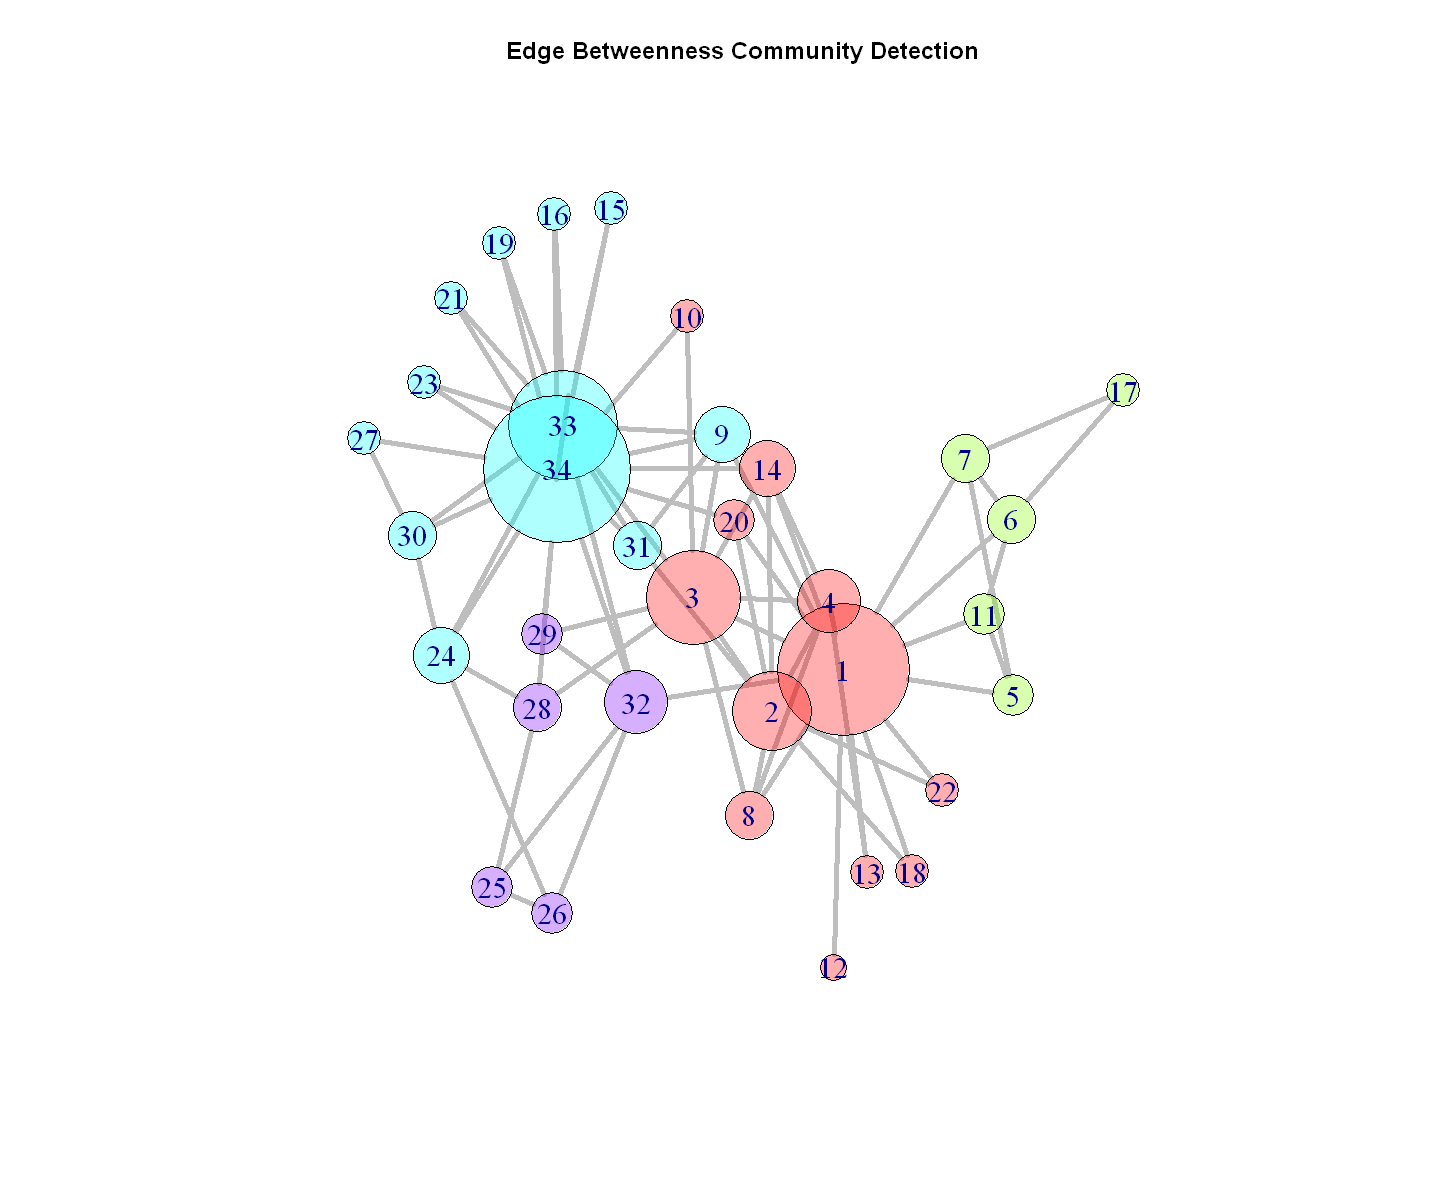

In [9]:
# 使用Edge Betweenness算法进行社区检测
eb_community <- cluster_edge_betweenness(g)

communities <- membership(eb_community)

# 设置颜色，并加入透明度
community_colors <- rainbow(length(unique(communities)))
node_colors <- sapply(communities, function(x) {
  rgb_val <- col2rgb(community_colors[x])
  rgb(rgb_val[1], rgb_val[2], rgb_val[3], alpha = 80, maxColorValue = 255)
})

# 可视化结果
node_size = degree_data * 2 + 5
plot(g, layout = layout, vertex.size = node_size, 
     vertex.label.cex = 1.5, 
     vertex.color = node_colors,
     edge.width = 4, 
     edge.color = "gray", 
     edge.lty = "solid",
     main = "Edge Betweenness Community Detection")

## Walktrap算法

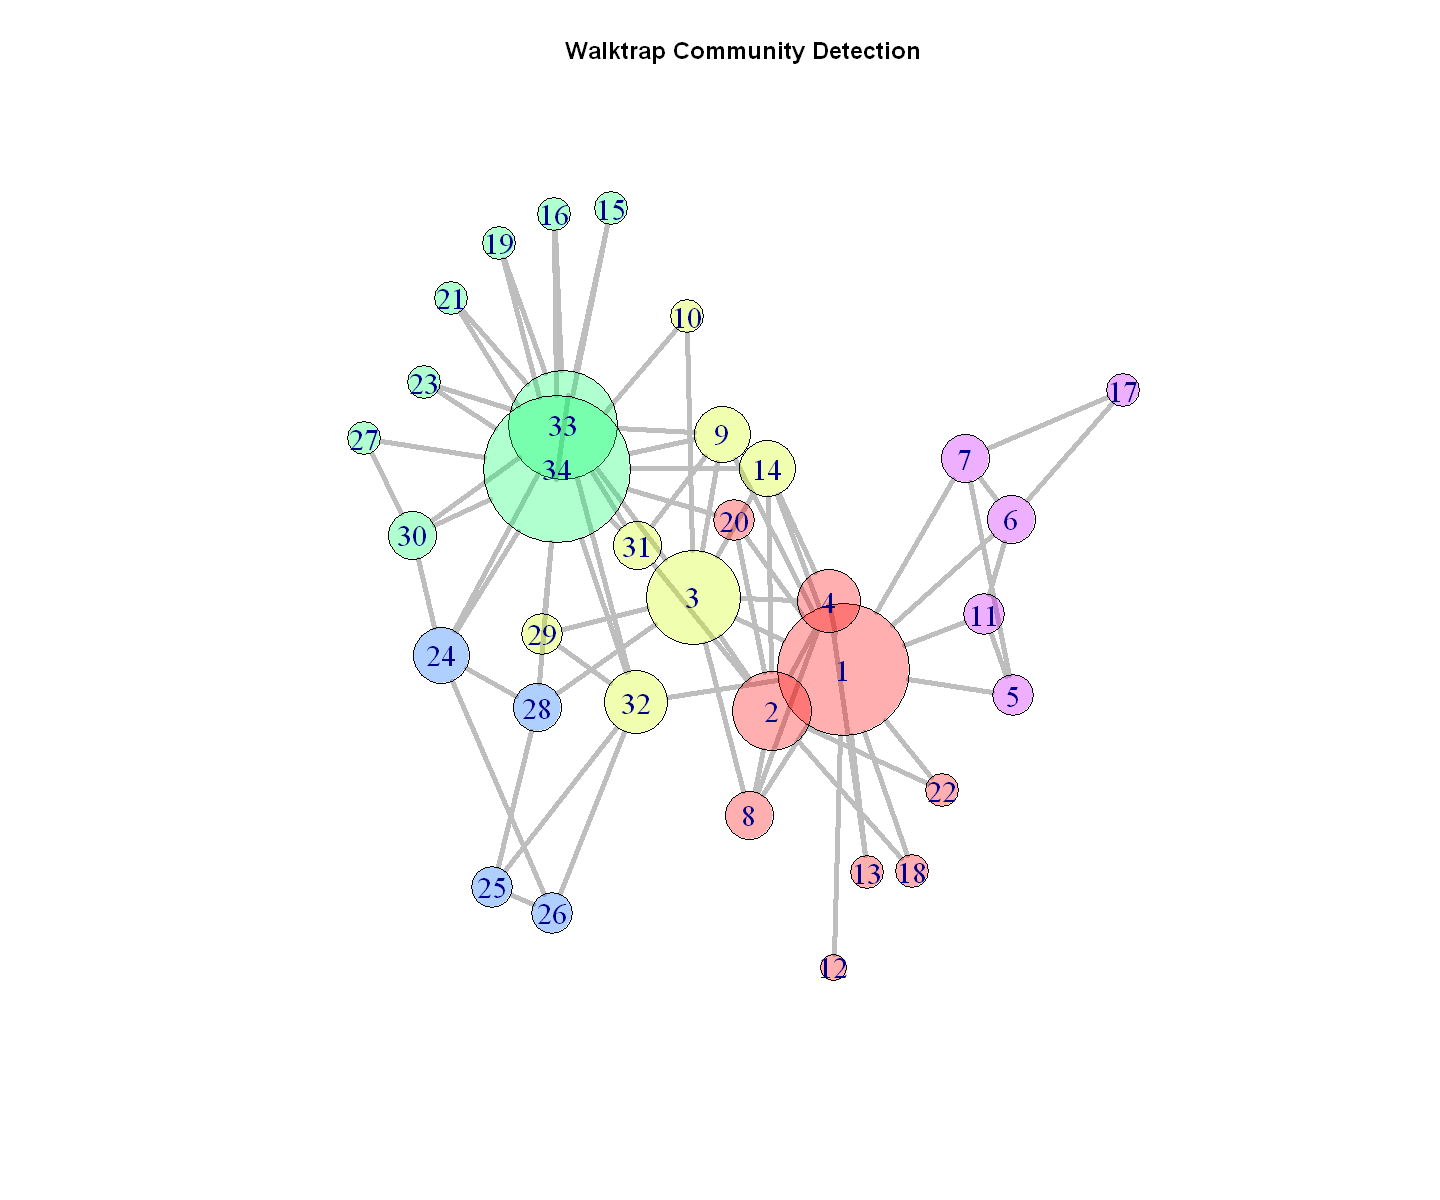

In [10]:
# 使用Edge Betweenness算法进行社区检测
walktrap_community <- cluster_walktrap(g)

communities <- membership(walktrap_community)

# 设置颜色，并加入透明度
community_colors <- rainbow(length(unique(communities)))
node_colors <- sapply(communities, function(x) {
  rgb_val <- col2rgb(community_colors[x])
  rgb(rgb_val[1], rgb_val[2], rgb_val[3], alpha = 80, maxColorValue = 255)
})

# 可视化结果
node_size = degree_data * 2 + 5
plot(g, layout = layout, vertex.size = node_size, 
     vertex.label.cex = 1.5, 
     vertex.color = node_colors,
     edge.width = 4, 
     edge.color = "gray", 
     edge.lty = "solid",
     main = "Walktrap Community Detection")

# Dynamic network

In [11]:
V(g)

+ 34/34 vertices, named, from 36297ea:
 [1] 1  2  3  4  5  6  7  9  10 14 15 16 19 20 21 23 24 25 26 27 28 29 30 31 32
[26] 33 8  11 12 13 18 22 17 34

## simulation

In [12]:
beta <- 0.3  # 传染率
gamma <- 0.5 # 恢复率
max_iter <- 6

In [13]:
vertex_df_margin = data.frame()
set.seed(2024)
V(g)$state <- 0
# 1.随机定位一个感染源
initial_infected <- 33
V(g)$state[initial_infected] <- 1

for (iter in 1:max_iter){
    infected_nodes <- V(g)[state == 1]

    for (node in infected_nodes) {
        # 2.获取和感染源的朋友
        neighbors <- neighbors(g, node)
        susceptible_neighbors <- neighbors[state == 0]
        # 3.runif随机生成0-1的数字，如果邻居位置的数字比感染率小，则被感染
        new_infections <- susceptible_neighbors[runif(length(susceptible_neighbors)) < beta]
        V(g)$state[new_infections] <- 1
    }

    # 恢复过程
    recovering_nodes <- infected_nodes[runif(length(infected_nodes)) < gamma]
    V(g)$state[recovering_nodes] <- 2
    
    vertex_df <- as_data_frame(g, what = "vertices") # graph格式转化为dataframe
    vertex_df$'timestamp' = iter
    vertex_df_margin = rbind(vertex_df_margin, vertex_df)
}

In [14]:
vertex_df_center = data.frame()
set.seed(2024)
V(g)$state <- 0
# 1.随机定位一个感染源
initial_infected <- 34
V(g)$state[initial_infected] <- 1

for (iter in 1:max_iter){
    infected_nodes <- V(g)[state == 1]

    for (node in infected_nodes) {
        # 2.获取和感染源的朋友
        neighbors <- neighbors(g, node)
        susceptible_neighbors <- neighbors[state == 0]
        # 3.runif随机生成0-1的数字，如果邻居位置的数字比感染率小，则被感染
        new_infections <- susceptible_neighbors[runif(length(susceptible_neighbors)) < beta]
        V(g)$state[new_infections] <- 1
    }

    # 恢复过程
    recovering_nodes <- infected_nodes[runif(length(infected_nodes)) < gamma]
    V(g)$state[recovering_nodes] <- 2
    
    vertex_df <- as_data_frame(g, what = "vertices") # graph格式转化为dataframe
    vertex_df$'timestamp' = iter
    vertex_df_center = rbind(vertex_df_center, vertex_df)
}

## plot

In [15]:
edges = read.csv('data/karata.csv') # 数据集为karata俱乐部成员之间的关系
nodes = unique(c(edges[,1], edges[,2]))

options(repr.plot.width=12, repr.plot.height=10)
# 初始化并固定布局
g = graph_from_data_frame(d = edges, vertices = nodes, directed = FALSE)
layout = layout_with_kk(g)

state_colors <- c(rgb(135, 206, 235, alpha = 150, maxColorValue = 255),  
                  rgb(220, 20, 60, alpha = 150, maxColorValue = 255),  
                  rgb(60, 179, 113, alpha = 150, maxColorValue = 255)) 

plot_graph_at_time = function(timestamp,vertex_df_all){
    nodes_at_time = vertex_df_all[vertex_df_all$timestamp ==timestamp,]
    g = graph_from_data_frame(d = edges, vertices = nodes_at_time, directed = FALSE)
    node_size = degree_data * 2 + 5
    plot(g, layout = layout, vertex.size = node_size, 
        vertex.label.cex = 1.5, 
        vertex.color = state_colors[V(g)$state + 1],

        edge.width = 4, 
        edge.color = "gray", 
        edge.lty = "solid",
        
        main=paste("Timestamp:", timestamp))
}

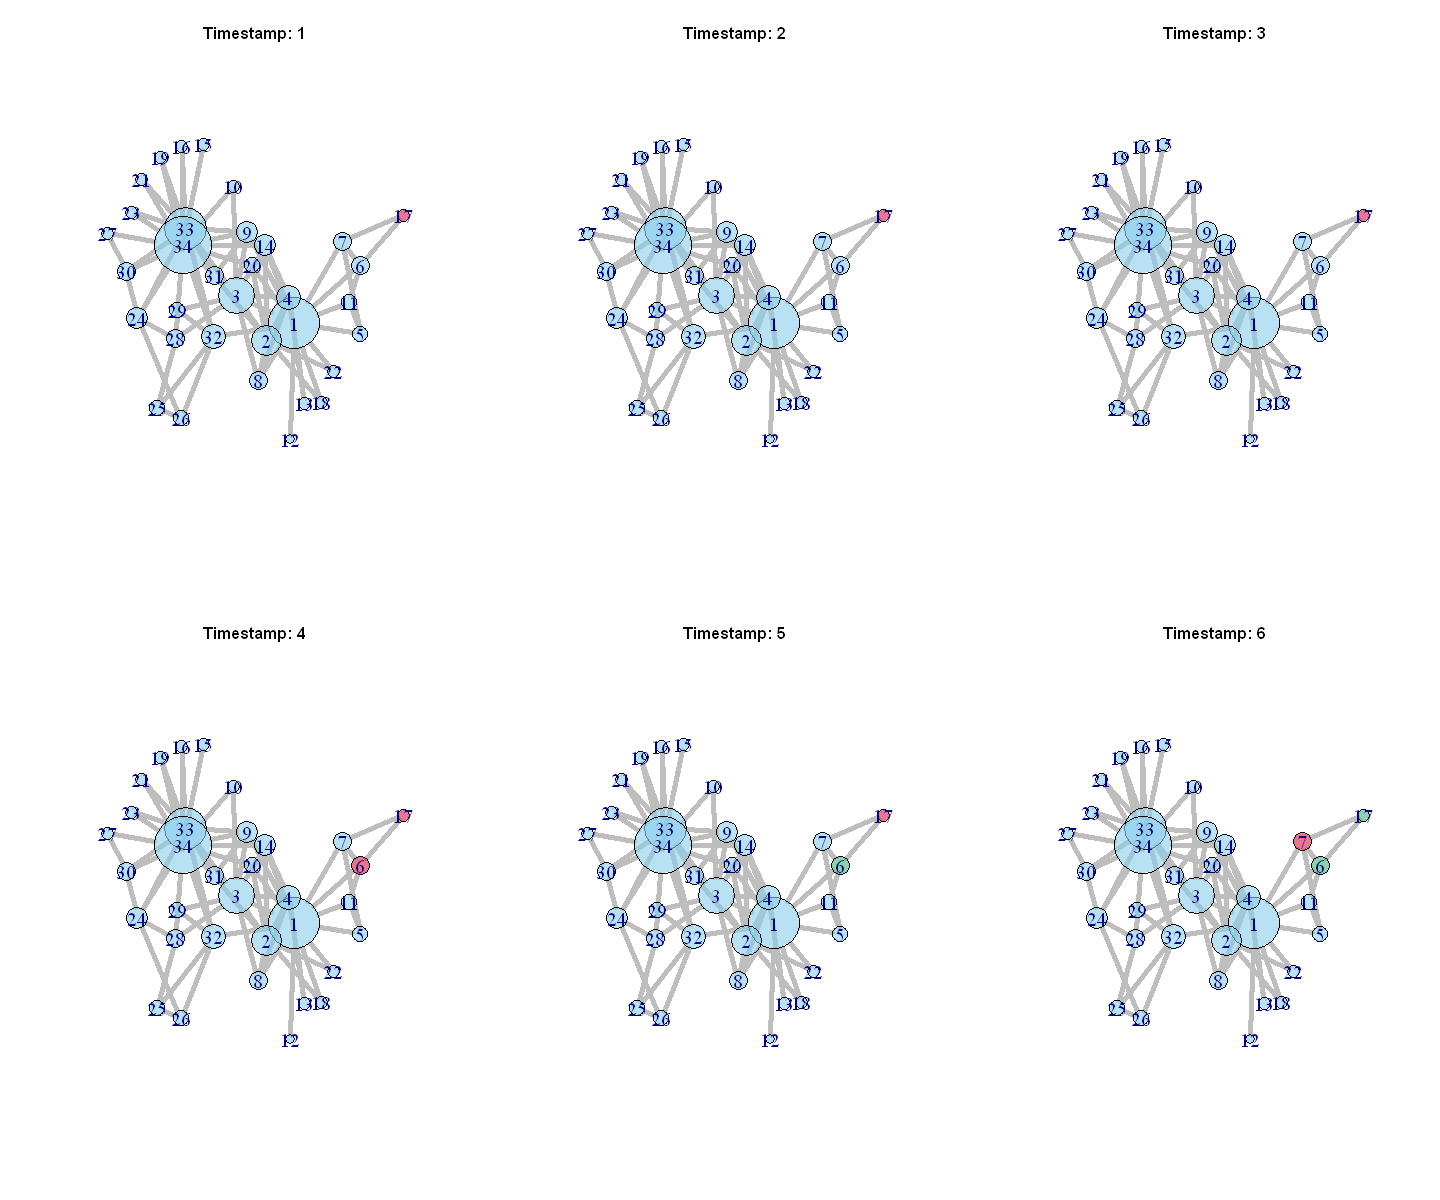

In [16]:
par(mfrow=c(2, 3))
plot_graph_at_time(1,vertex_df_margin)
plot_graph_at_time(2,vertex_df_margin)
plot_graph_at_time(3,vertex_df_margin)
plot_graph_at_time(4,vertex_df_margin)
plot_graph_at_time(5,vertex_df_margin)
plot_graph_at_time(6,vertex_df_margin)

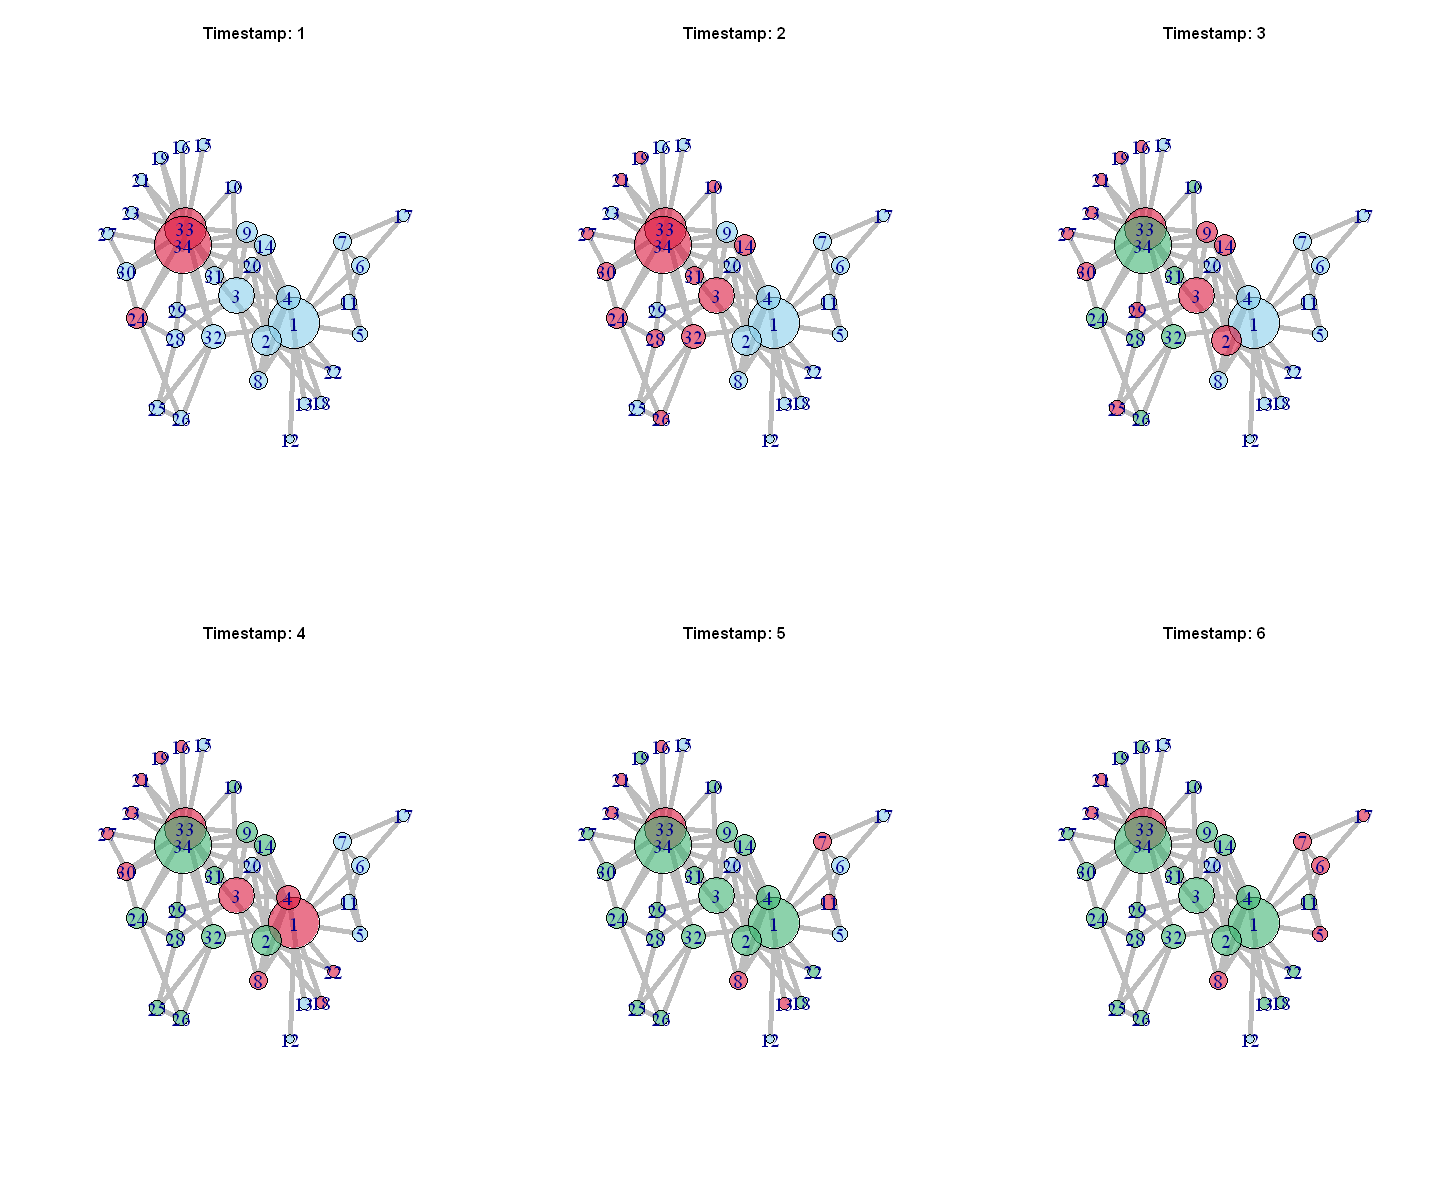

In [17]:
par(mfrow=c(2, 3))
plot_graph_at_time(1,vertex_df_center)
plot_graph_at_time(2,vertex_df_center)
plot_graph_at_time(3,vertex_df_center)
plot_graph_at_time(4,vertex_df_center)
plot_graph_at_time(5,vertex_df_center)
plot_graph_at_time(6,vertex_df_center)

对比从边缘的第17号成员，若从处于核心位置的第34成员开始传播病毒，可能波及的人将更多。<br>
蓝色是健康的人，红色是被感染的人，绿色是感染后又恢复的人。